## Plots for Distribution of Degree and Bewteenness over EC classes  

In [1]:
import pandas as pd
import seaborn as sns
import json
from matplotlib import pyplot as plt
sns.set() # S
sns.set_context("paper")
sns.set_style(style='whitegrid')

In [2]:
def load_json(path):
    ''' 
    Loads jsons given a path. 
    '''
    with open(path,'r') as f:
        data = json.load(f)
    return data


In [3]:
class Domain:

    def __init__(self,name):

        
        self.name = name
        
        self.path_degree = "../results/topology/degree/degree_distribution_over_EC_%s.json"%(self.name)

        cb = {'black':[0,0,0], 'orange':[230/255,159/255,0], 'skyblue':[86/255,180/255,233/255],
        'bluishgreen':[0,158/255,115/255], 'yellow':[240/255,228/255,66/255],'blue':[0,114/255,178/255],
        'vermillion':[213/255,94/255,0],'reddishpurple':[204/255,121/255,167/255], 'brown':[109, 22, 3]}

        #'brown': HEX #6D1603 RGB 109, 22, 3  HSL 11, 97%, 22%
        color = {'Metagenome': cb['bluishgreen'],
            'Bacteria': cb['blue'],
            'Archaea': cb['vermillion'],
            'Eukaryota': cb['orange'],
            'LUCA': cb['black'],
            'Biosphere': cb['skyblue']}

        self.color = color[self.name]
    


In [4]:
archaea = Domain('Archaea')
bacteria = Domain('Bacteria')
eukaryota = Domain('Eukaryota')
metagenome = Domain('Metagenome')
luca = Domain("LUCA")
biosphere = Domain("Biosphere")

ec_class_name = {'1':'oxidoreductases',
     '2':'transferases',
    '3': 'hydrolases',
    '4': 'lyases',
    '5': 'isomerases',
    '6': 'ligases'}


In [28]:
list_domain = [archaea, bacteria, eukaryota, metagenome, luca, biosphere]
#list_domain = [luca, biosphere]
data = dict()
for domain in list_domain:
    data[domain] = load_json(domain.path_degree)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


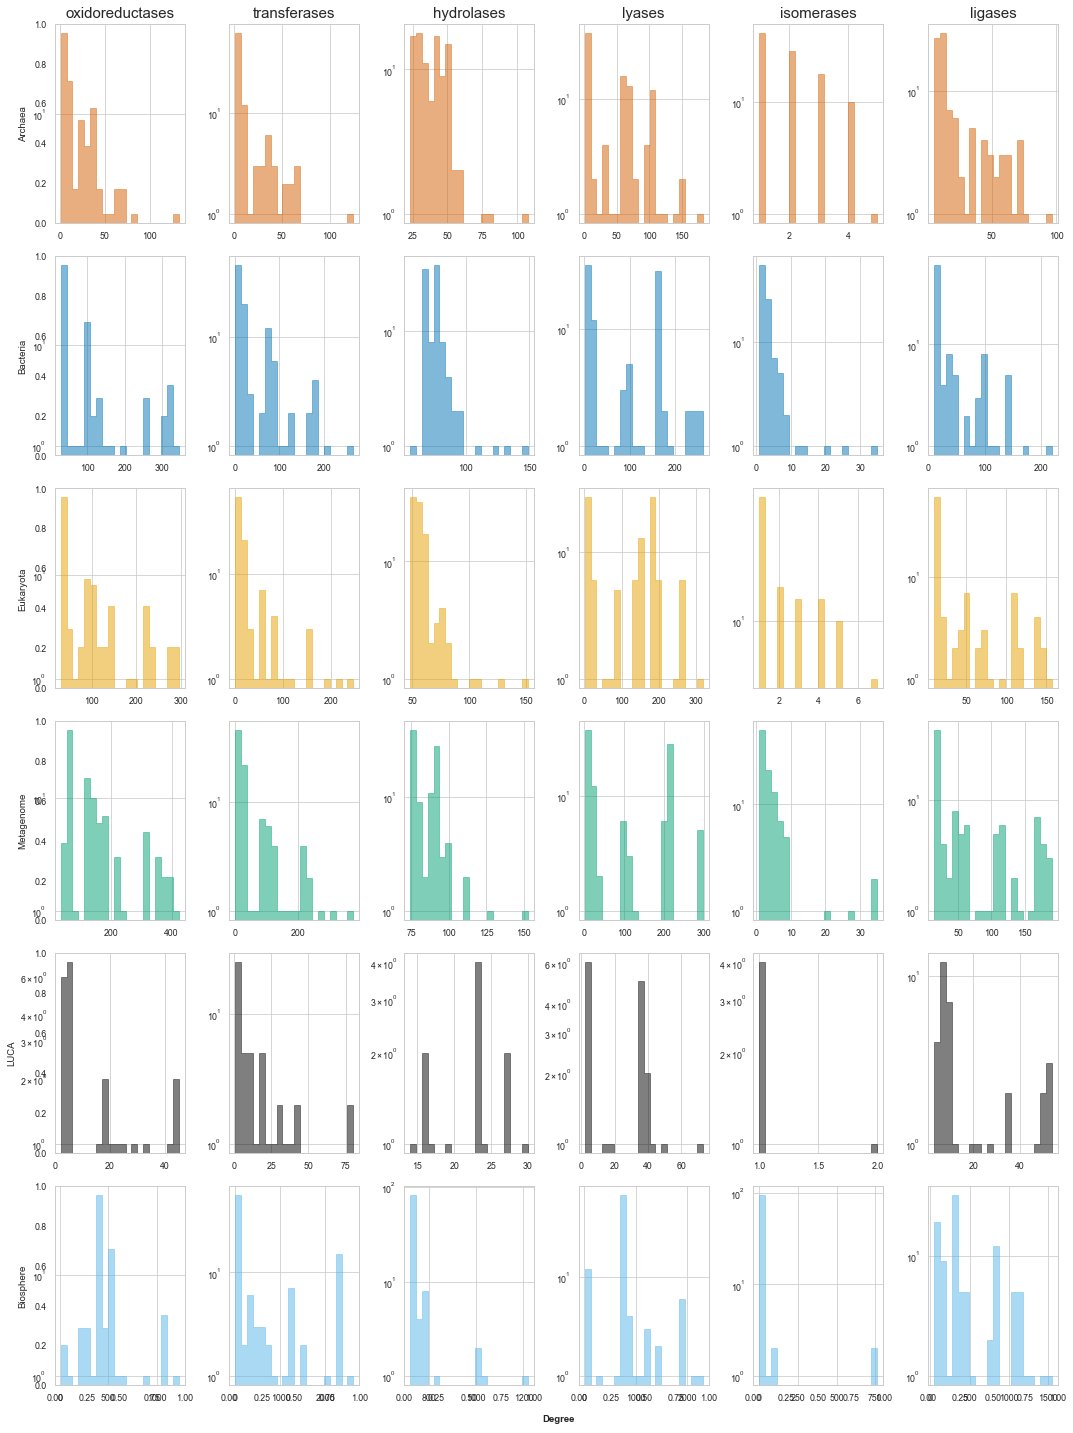

In [31]:

fig, axes = plt.subplots(len(list_domain), 6, figsize=(15,20), sharex=True, sharey=True)
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')
# axes[0].set_title('Title of the first chart')


j = 0
for domain in list_domain:
    i = 0
    for ec_index in range(1, 7):
        fig.add_subplot(len(list_domain), 6, ec_index + j)
        print(ec_index + j)
        ec_class = str(ec_index) 
        x = data[domain][ec_class][:100]
        plt.hist(x, histtype='step', bins=20, log=True, fill=True, alpha=0.5, label=domain.name, color=domain.color)
        #ax = plt.gca()
        #ax.set_xlim([0,500])
        
        #ax.set_ylim([0,100000])
        
        i += 1
        if domain == archaea:
            plt.title(ec_class_name[ec_class], fontsize= 15)
        if ec_index == 1:
            plt.ylabel(domain.name)
        
    j += i    

plt.xlabel(' \n')
fig.text(0.52, 0.01, 'Degree', ha='center',weight='bold')
plt.tight_layout()
plt.savefig("../plots/degree_distribution_log.png", dpi = 300)


In [7]:
# plt.figure(figsize=(15,10)) #sharex=True, sharey=True)
# # fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
# # fig.suptitle('Bigger 1 row x 2 columns axes with no data')
# # axes[0].set_title('Title of the first chart')
# 
# 
# j = 0
# for domain in list_domain:
#     i = 0
#     for ec_index in range(1, 7):
#         plt.subplot(len(list_domain), 6, ec_index + j)
#         print(ec_index + j)
#         ec_class = str(ec_index) 
#         x = data[domain][ec_class][:100]
#         plt.hist(x, histtype='step', bins=20, log=True, fill=True, alpha=0.5, label=domain.name, color=domain.color)
#         #ax = plt.gca()
#         #ax.set_xlim([0,500])
#         #ax.set_ylim([0,100000])
#         
#         i += 1
#         if domain == archaea:
#             plt.title(ec_class_name[ec_class], fontsize= 15)
#         if ec_index == 1:
#             plt.ylabel(domain.name)
#         
#     j += i    
# 
# #plt.text(110, 0.03, 'Degree', ha='center',weight='bold')
# plt.tight_layout()
# plt.savefig("../plots/degree_distribution_log.png", dpi = 300)





